# 0. 환경설정 및 워크벤치 세팅

## 워크벤치 세팅

In [ ]:
! pip install pandas sqlalchemy pymysql -q

ERROR: Operation cancelled by user


In [ ]:
user = 'root'
password = 'password'
host = 'localhost'
port = 3306
database = 'Kaggle_HR'

In [ ]:
from sqlalchemy import create_engine

# 1) 커넥션 URL 생성
url = f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}?charset=utf8mb4"
engine = create_engine(url)

ModuleNotFoundError: No module named 'pymysql'

In [ ]:
data_path = 'wfs_behaviors_and_records_508p-546d-98r_20220722173739.csv'
hr_df = pd.read_csv(data_path, encoding='cp1252')

In [ ]:
hr_df.to_sql('hr_table', engine, if_exists='append', index=False)

## VSCODE 세팅

In [ ]:
! pip install koreanize_matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [ ]:
data_path = 'wfs_behaviors_and_records_508p-546d-98r_20220722173739.csv'
hr_df = pd.read_csv(data_path, encoding='cp1252')

## 구글 세팅

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 64.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [ ]:
data_path = '/content/drive/MyDrive/데이터분석_개인/wfs_behaviors_and_records_508p-546d-98r_20220722173739.csv'
hr_df = pd.read_csv(data_path, encoding='cp1252')

<ipython-input-4-099f12ac6191>:2: DtypeWarning: Columns (35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  hr_df = pd.read_csv(data_path, encoding='cp1252')


# 1. 우리 회사 직원 현황

## 회사 현황 확인

In [ ]:
hr_df.head(2)

,sub_ID,sub_fname,sub_lname,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_coll_IDs,sub_colls_same_sex_prtn,...,event_weekday_num,event_weekday_name,behav_comptype_h,behav_cause_h,actual_efficacy_h,record_comptype,record_cause,recorded_efficacy,recorded_note_from_sup,record_conf_matrix_h
0,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Presence,NaN,NaN,Presence,NaN,NaN,NaN,NaN
1,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,1.489,Efficacy,NaN,1.2,NaN,NaN


In [ ]:
# 직원 기초 현황
unique_df = hr_df.drop_duplicates(subset='sub_ID')

total_count = unique_df['sub_ID'].nunique()
avg_age = unique_df['sub_age'].mean()
total_female = (unique_df['sub_sex'] == 'F').sum()  # () 조건이 참인 경우 1
total_male = (unique_df['sub_sex'] == 'M').sum()

print(f'전체 인원: {total_count}명')
print(f'나이 평균: {avg_age:.1f}')
print(f'여성 직원 수: {total_female}명')
print(f'남성 직원 수: {total_male}명')

전체 인원: 687명
나이 평균: 41.4
여성 직원 수: 359명
남성 직원 수: 328명


In [ ]:
# 직원 역량 평균 확인
avg_health = unique_df['sub_health_h'].mean()
avg_commitment = unique_df['sub_commitment_h'].mean()
avg_perceptiveness = unique_df['sub_perceptiveness_h'].mean()
avg_dexterity = unique_df['sub_dexterity_h'].mean()
avg_sociality = unique_df['sub_sociality_h'].mean()
avg_goodness = unique_df['sub_goodness_h'].mean()
avg_strength = unique_df['sub_strength_h'].mean()
avg_openmindness = unique_df['sub_openmindedness_h'].mean()

print('우리 회사의 직원 역량 평균')
print(f'건강: {avg_health:.3f}')
print(f'헌신도: {avg_commitment:.3f}')
print(f'인지력: {avg_perceptiveness:.3f}')
print(f'손재주: {avg_dexterity:.3f}')
print(f'사회성: {avg_sociality:.3f}')
print(f'선량함: {avg_goodness:.3f}')
print(f'힘: {avg_strength:.3f}')
print(f'수용성: {avg_openmindness:.3f}')

우리 회사의 직원 역량 평균
건강: 0.743
헌신도: 0.747
인지력: 0.742
손재주: 0.736
사회성: 0.740
선량함: 0.740
힘: 0.740
수용성: 0.754


In [ ]:
# shift, team 별 현황
shift_info = unique_df.groupby(['sub_shift', 'sub_team']).agg({
	'sub_ID': 'nunique',
	'sub_age' : 'mean',
  	'sub_sex': [
    	('여성', lambda x: (x=='F').sum()),
   		('남성', lambda x: (x=='M').sum())
  ]
})

shift_info.reset_index(inplace=True)
shift_info.columns = ['shift', 'team', '인원수', '평균 나이', '여성', '남성']
print(shift_info)

         shift        team  인원수      평균 나이  여성  남성
0      Shift 1      Team 1   29  37.965517  12  17
1      Shift 1      Team 2   26  45.884615  15  11
2      Shift 1      Team 3   28  40.392857  16  12
3      Shift 1      Team 4   28  38.321429  14  14
4      Shift 1      Team 5   27  41.666667  15  12
5      Shift 1      Team 6   31  41.612903  17  14
6      Shift 1      Team 7   25  40.120000  12  13
7      Shift 1      Team 8   31  45.129032  13  18
8      Shift 1  unassigned    1  24.000000   1   0
9      Shift 2     Team 10   27  42.333333  10  17
10     Shift 2     Team 11   30  43.933333  19  11
11     Shift 2     Team 12   34  45.676471  25   9
12     Shift 2     Team 13   25  39.560000  18   7
13     Shift 2     Team 14   31  39.290323  12  19
14     Shift 2     Team 15   31  37.709677  14  17
15     Shift 2     Team 16   26  41.230769  12  14
16     Shift 2      Team 9   25  40.600000  12  13
17     Shift 2  unassigned    1  23.000000   0   1
18     Shift 3     Team 17   28

In [ ]:
# shift, team 별 역량 평균
shift_info = unique_df.groupby(['sub_shift', 'sub_team']).agg({
  'sub_health_h':'mean',
  'sub_commitment_h' :'mean',
  'sub_perceptiveness_h':'mean',
  'sub_dexterity_h':'mean',
  'sub_sociality_h':'mean',
  'sub_goodness_h':'mean',
  'sub_strength_h':'mean',
  'sub_openmindedness_h':'mean'
})

shift_info.reset_index(inplace=True)
shift_info.columns = ['shift', 'team', '건강', '헌신도', '인지력', '손재주', '사회성', '선량함', '힘', '수용성']
print(shift_info)

         shift        team        건강       헌신도       인지력       손재주       사회성  \
0      Shift 1      Team 1  0.706310  0.757172  0.714207  0.739103  0.783621   
1      Shift 1      Team 2  0.727346  0.660654  0.674038  0.745115  0.783962   
2      Shift 1      Team 3  0.756571  0.757321  0.760000  0.783643  0.735607   
3      Shift 1      Team 4  0.708107  0.754214  0.783214  0.730643  0.721250   
4      Shift 1      Team 5  0.714148  0.770222  0.783667  0.750630  0.734704   
5      Shift 1      Team 6  0.698871  0.775710  0.722516  0.702323  0.698161   
6      Shift 1      Team 7  0.675120  0.761960  0.738920  0.711280  0.776720   
7      Shift 1      Team 8  0.762032  0.729129  0.746548  0.766097  0.741032   
8      Shift 1  unassigned  0.983000  0.842000  0.948000  0.836000  0.830000   
9      Shift 2     Team 10  0.719259  0.781593  0.764444  0.750185  0.694630   
10     Shift 2     Team 11  0.781733  0.756333  0.728867  0.691733  0.720867   
11     Shift 2     Team 12  0.719029  0.

## 생산성 변화

In [ ]:
recent_df = recent_df[recent_df['event_date'].dt.year == 2022]

In [ ]:
recent_df['event_month'] = recent_df['event_date'].dt.to_period('M').dt.to_timestamp()

<ipython-input-34-255f2b232024>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_df['event_month'] = recent_df['event_date'].dt.to_period('M').dt.to_timestamp()


In [ ]:
group_efficacy = recent_df.groupby(['event_month', 'performance_group'])['actual_efficacy_h'].mean().reset_index()
group_efficacy

<ipython-input-37-a0d79624cd26>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_efficacy = recent_df.groupby(['event_month', 'performance_group'])['actual_efficacy_h'].mean().reset_index()


,event_month,performance_group,actual_efficacy_h
0,2022-01-01,5,0.470775
1,2022-01-01,4,0.608667
2,2022-01-01,3,0.723795
3,2022-01-01,2,0.855083
4,2022-01-01,1,1.013037
5,2022-02-01,5,0.459685
6,2022-02-01,4,0.591330
7,2022-02-01,3,0.684094
8,2022-02-01,2,0.787376
9,2022-02-01,1,0.974619


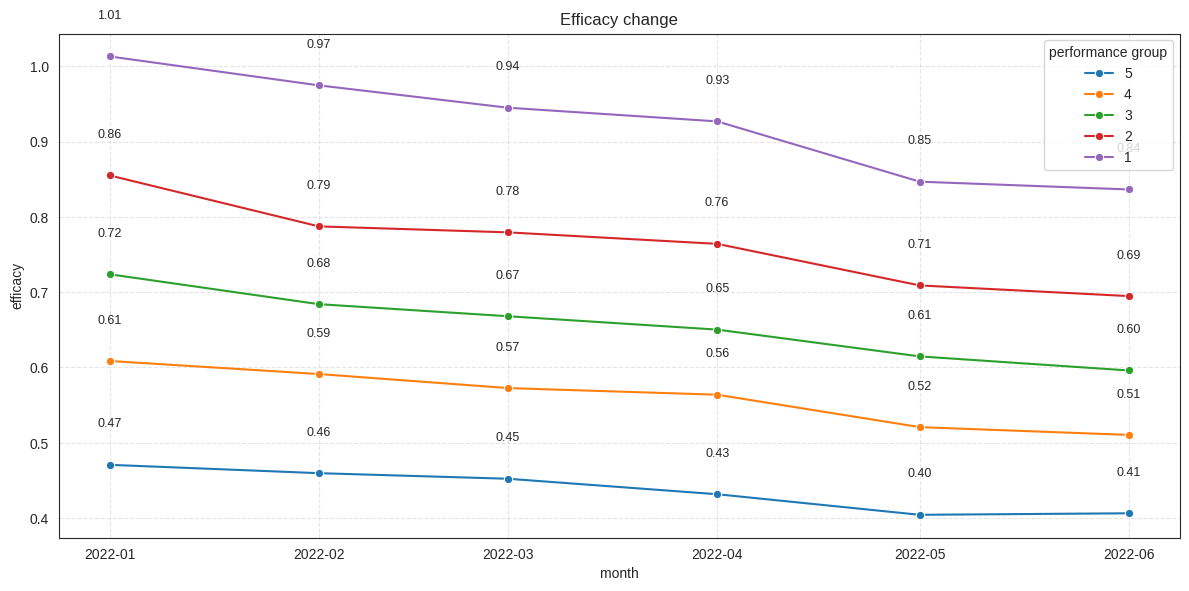

In [ ]:
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(data=group_efficacy, x='event_month', y='actual_efficacy_h', hue='performance_group', marker='o')

for line in group_efficacy['performance_group'].unique():
    group_data = group_efficacy[group_efficacy['performance_group'] == line]
    for x, y in zip(group_data['event_month'], group_data['actual_efficacy_h']):
        plt.text(x, y + 0.05, f'{y:.2f}', ha='center', fontsize=9)

plt.grid(True, which='major', axis='both', linestyle='--', alpha=0.5)
plt.title('Efficacy change')
plt.xlabel('month')
plt.ylabel('efficacy')
plt.legend(title='performance group')
plt.tight_layout()
plt.show()

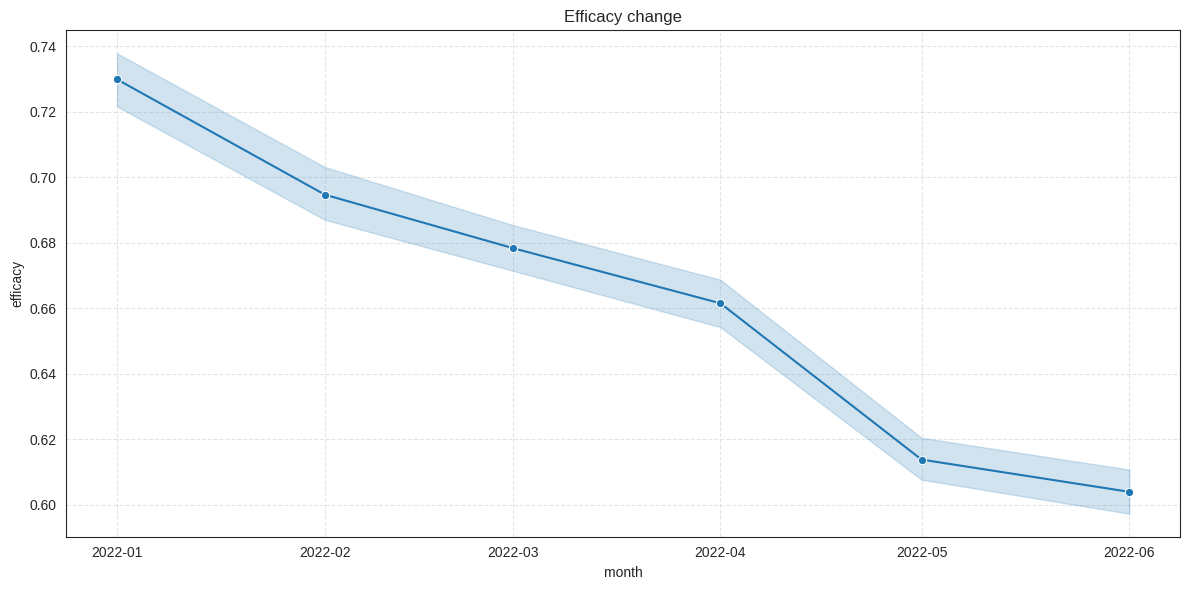

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=recent_df, x='event_month', y='actual_efficacy_h', marker='o')
plt.grid(True, which='major', axis='both', linestyle='--', alpha=0.5)
plt.title('Efficacy change')
plt.xlabel('month')
plt.ylabel('efficacy')
plt.tight_layout()
plt.show()

In [ ]:
recent_df.groupby(by='performance_group')['actual_efficacy_h'].mean()

<ipython-input-59-9bd7ad490896>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recent_df.groupby(by='performance_group')['actual_efficacy_h'].mean()


,actual_efficacy_h
performance_group,
5,0.437284
4,0.560370
3,0.654776
2,0.763725
1,0.923629


# 2. 고성과자 확인
- 고성과자 기준 : event_date 기준 최근 6개월 이내, efficacy 평균, 상위 20%


## performance group 분류

In [ ]:
hr_df.head(2)

,sub_ID,sub_fname,sub_lname,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_coll_IDs,sub_colls_same_sex_prtn,...,event_weekday_num,event_weekday_name,behav_comptype_h,behav_cause_h,actual_efficacy_h,record_comptype,record_cause,recorded_efficacy,recorded_note_from_sup,record_conf_matrix_h
0,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Presence,NaN,NaN,Presence,NaN,NaN,NaN,NaN
1,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,...,4,Friday,Efficacy,NaN,1.489,Efficacy,NaN,1.2,NaN,NaN


In [ ]:
hr_df['behav_comptype_h'].value_counts()

,count
behav_comptype_h,
Presence,191657
Efficacy,191657
Absence,6524
Sacrifice,5356
Teamwork,4814
Feat,3937
Idea,3899
Lapse,1587
Slip,994


In [ ]:
hr_df['event_date'] = pd.to_datetime(hr_df['event_date'])

In [ ]:
from dateutil.relativedelta import relativedelta

latest_date = hr_df['event_date'].max()
six_month_ago = latest_date - relativedelta(months=6)
recent_df = hr_df[hr_df['event_date'] >= six_month_ago]

recent_df.shape

(138464, 42)

In [ ]:
hr_df.shape

(411948, 42)

In [ ]:
recent_df.head(2)

,sub_ID,sub_fname,sub_lname,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_coll_IDs,sub_colls_same_sex_prtn,...,event_weekday_num,event_weekday_name,behav_comptype_h,behav_cause_h,actual_efficacy_h,record_comptype,record_cause,recorded_efficacy,recorded_note_from_sup,record_conf_matrix_h
273484,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,...,3,Thursday,Presence,NaN,NaN,Presence,NaN,NaN,NaN,NaN
273485,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,...,3,Thursday,Efficacy,NaN,1.563,Efficacy,NaN,1.9,NaN,NaN


In [ ]:
recent_df['behav_comptype_h'].value_counts()

,count
behav_comptype_h,
Presence,64376
Efficacy,64376
Absence,2191
Sacrifice,1865
Teamwork,1628
Feat,1351
Idea,1314
Lapse,532
Slip,326


In [ ]:
# sub_ID별 actual_efficacy_h 평균을 기준으로 성과그룹 분류 필요

# 일단 sub_ID별 생산성 평균을 구하기
avg_efficacy = recent_df.groupby('sub_ID').agg({'actual_efficacy_h':'mean'})

# 생산성 평균을 기준으로 performance_group 만들기
avg_efficacy['performance_group'] = pd.qcut(
    avg_efficacy['actual_efficacy_h'],
    q=5,
    labels=[5,4,3,2,1]
)

avg_efficacy.reset_index(inplace=True)

# recent_df에 병합
recent_df = recent_df.merge(avg_efficacy[['sub_ID', 'performance_group']], on='sub_ID', how='left')

## 그룹별 역량 차이 확인

In [ ]:
perf_group_competency = recent_df.groupby(['performance_group']).agg({
  'sub_age':'mean',
  'sub_health_h':'mean',
  'sub_commitment_h' :'mean',
  'sub_perceptiveness_h':'mean',
  'sub_dexterity_h':'mean',
  'sub_sociality_h':'mean',
  'sub_goodness_h':'mean',
  'sub_strength_h':'mean',
  'sub_openmindedness_h':'mean',
  'actual_efficacy_h': 'mean'
})

perf_group_competency

<ipython-input-10-14b098511f8b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  perf_group_competency = recent_df.groupby(['performance_group']).agg({


,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,actual_efficacy_h
performance_group,,,,,,,,,,
5,35.098528,0.730270,0.736894,0.755204,0.742194,0.745628,0.740126,0.757120,0.770708,0.440926
4,39.346763,0.765797,0.753724,0.736771,0.764459,0.745298,0.731308,0.749550,0.756309,0.565265
3,43.238759,0.747819,0.758048,0.756695,0.733137,0.746827,0.720954,0.731655,0.734730,0.659152
2,42.041424,0.736399,0.755263,0.749314,0.758372,0.731056,0.747146,0.730307,0.783343,0.769191
1,46.798717,0.754156,0.768591,0.727958,0.733699,0.721538,0.764208,0.723821,0.747172,0.930426


In [ ]:
from scipy.stats import f_oneway

# 역량 컬럼 리스트
competency_cols = [
    'sub_age', 'sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h',
    'sub_dexterity_h', 'sub_sociality_h', 'sub_goodness_h',
    'sub_strength_h', 'sub_openmindedness_h'
]

# 각 컬럼에 대해 ANOVA 수행
anova_results = {}
for col in competency_cols:
    groups = [group[col].dropna().values for name, group in recent_df.groupby('performance_group')]
    f_stat, p_val = f_oneway(*groups)
    anova_results[col] = {'F-statistic': f_stat, 'p-value': p_val}

# 결과 확인
import pandas as pd
anova_df = pd.DataFrame(anova_results).T
anova_df.sort_values('p-value')

<ipython-input-11-2ca50107ea52>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col].dropna().values for name, group in recent_df.groupby('performance_group')]


,F-statistic,p-value
sub_age,3065.299578,0.000000e+00
sub_openmindedness_h,406.966632,0.000000e+00
sub_goodness_h,346.665121,1.680943e-297
sub_dexterity_h,254.153479,5.693585e-218
sub_health_h,235.176629,1.228524e-201
sub_strength_h,205.538882,4.088498e-176
sub_commitment_h,170.817521,3.368038e-146
sub_perceptiveness_h,169.674059,3.257017e-145
sub_sociality_h,129.561363,1.224829e-110


<mark> openmindedness는 그룹별로 유의미한 차이가 있다.

In [ ]:
# Tukey HSD 사후검정 : 성과 그룹 간 개방성 지표 평균 차이가 유의미한지 비교
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=recent_df['sub_openmindedness_h'],
                          groups=recent_df['performance_group'],
                          alpha=0.05)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2   0.0362   0.0  0.0324  0.0399   True
     1      3  -0.0124   0.0 -0.0161 -0.0088   True
     1      4   0.0091   0.0  0.0055  0.0128   True
     1      5   0.0235   0.0  0.0199  0.0272   True
     2      3  -0.0486   0.0 -0.0523  -0.045   True
     2      4   -0.027   0.0 -0.0307 -0.0234   True
     2      5  -0.0126   0.0 -0.0163  -0.009   True
     3      4   0.0216   0.0   0.018  0.0252   True
     3      5    0.036   0.0  0.0324  0.0396   True
     4      5   0.0144   0.0  0.0108   0.018   True
---------------------------------------------------


| 컬럼                 | 의미                             |
| ------------------ | ------------------------------ |
| `group1`, `group2` | 비교한 성과 그룹                      |
| `meandiff`         | 그룹 간 평균 차이 (`group2 - group1`) |
| `p-adj`            | 조정된 p-value (다중비교 보정된 값)       |
| `lower`, `upper`   | 평균 차이의 신뢰구간 (95%)              |
| `reject`           | `True`면 유의미한 차이 있음 (귀무가설 기각)   |

```python
- 고성과자 그룹일수록 sub_openmindedness_h가 낮은 경향일 수 있음
- 특히 2번 그룹이 개방성이 가장 높고, 3번이 낮음
- 모든 그룹 간 차이가 유의미하기 때문에, 선형적이진 않아도 계층적 구분이 뚜렷하다고 해석 가능
```

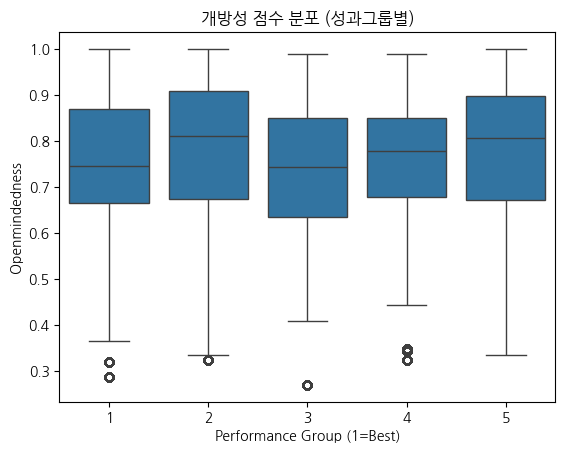

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='performance_group', y='sub_openmindedness_h', data=recent_df, order=[1,2,3,4,5])
plt.title('개방성 점수 분포 (성과그룹별)')
plt.xlabel('Performance Group (1=Best)')
plt.ylabel('Openmindedness')
plt.show()

## 그룹별 슈퍼바이저 차이 확인

In [ ]:
recent_df['performance_group'] = recent_df['performance_group'].astype(int)

In [ ]:
recent_df.columns

Index(['sub_ID', 'sub_fname', 'sub_lname', 'sub_age', 'sub_sex', 'sub_shift',
       'sub_team', 'sub_role', 'sub_coll_IDs', 'sub_colls_same_sex_prtn',
       'sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h',
       'sub_dexterity_h', 'sub_sociality_h', 'sub_goodness_h',
       'sub_strength_h', 'sub_openmindedness_h', 'sub_workstyle_h', 'sup_ID',
       'sup_fname', 'sup_lname', 'sup_age', 'sup_sub_age_diff', 'sup_sex',
       'sup_role', 'sup_commitment_h', 'sup_perceptiveness_h',
       'sup_goodness_h', 'event_date', 'event_week_in_series',
       'event_day_in_series', 'event_weekday_num', 'event_weekday_name',
       'behav_comptype_h', 'behav_cause_h', 'actual_efficacy_h',
       'record_comptype', 'record_cause', 'recorded_efficacy',
       'recorded_note_from_sup', 'record_conf_matrix_h', 'performance_group'],
      dtype='object')

In [ ]:
perf_group_sup = recent_df.groupby(['performance_group']).agg({
  'sup_age':'mean',
  'sup_sub_age_diff':'mean',
  'sup_commitment_h':'mean',
  'sup_perceptiveness_h':'mean',
  'sup_goodness_h':'mean'
})


perf_group_sup

,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h
performance_group,,,,,
1,45.062064,-1.736653,0.755037,0.730996,0.708710
2,38.533998,-3.507426,0.769136,0.743435,0.685488
3,39.329007,-3.961067,0.755175,0.720135,0.736206
4,37.309657,-2.037106,0.743427,0.724935,0.705947
5,42.268130,7.169602,0.741215,0.756862,0.718705


In [ ]:
# 역량 컬럼 리스트
sup_cols = ['sup_age', 'sup_sub_age_diff', 'sup_commitment_h','sup_perceptiveness_h', 'sup_goodness_h']

# 각 컬럼에 대해 ANOVA 수행
anova_results = {}
for col in sup_cols:
    groups = [group[col].dropna().values for name, group in recent_df.groupby('performance_group')]
    f_stat, p_val = f_oneway(*groups)
    anova_results[col] = {'F-statistic': f_stat, 'p-value': p_val}

# 결과 확인
import pandas as pd
anova_df = pd.DataFrame(anova_results).T
anova_df.sort_values('p-value')

,F-statistic,p-value
sup_age,1469.645336,0.000000e+00
sup_sub_age_diff,1637.482809,0.000000e+00
sup_goodness_h,395.355357,0.000000e+00
sup_perceptiveness_h,199.036476,1.636083e-170
sup_commitment_h,186.031249,2.619907e-159


In [ ]:
tukey = pairwise_tukeyhsd(endog=recent_df['sup_goodness_h'],
                          groups=recent_df['performance_group'],
                          alpha=0.05)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
     1      2  -0.0232   nan   nan   nan  False
     1      3      nan   nan   nan   nan  False
     1      4  -0.0028   nan   nan   nan  False
     1      5     0.01   nan   nan   nan  False
     2      3      nan   nan   nan   nan  False
     2      4   0.0205   nan   nan   nan  False
     2      5   0.0332   nan   nan   nan  False
     3      4      nan   nan   nan   nan  False
     3      5      nan   nan   nan   nan  False
     4      5   0.0128   nan   nan   nan  False
-----------------------------------------------


In [ ]:
recent_df.isnull().sum()

,0
sub_ID,0
sub_fname,0
sub_lname,0
sub_age,0
sub_sex,0
sub_shift,0
sub_team,0
sub_role,0
sub_coll_IDs,277
sub_colls_same_sex_prtn,334


In [ ]:
# nan 값 제외하고 분석
df_tukey = recent_df[['sup_goodness_h', 'performance_group']].dropna()
tukey = pairwise_tukeyhsd(endog=df_tukey['sup_goodness_h'],
                          groups=df_tukey['performance_group'],
                          alpha=0.05)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0232    0.0 -0.0269 -0.0196   True
     1      3   0.0275    0.0  0.0239  0.0311   True
     1      4  -0.0028 0.2258 -0.0064  0.0008  False
     1      5     0.01    0.0  0.0064  0.0136   True
     2      3   0.0507    0.0  0.0471  0.0543   True
     2      4   0.0205    0.0  0.0169  0.0241   True
     2      5   0.0332    0.0  0.0296  0.0368   True
     3      4  -0.0303    0.0 -0.0338 -0.0267   True
     3      5  -0.0175    0.0 -0.0211  -0.014   True
     4      5   0.0128    0.0  0.0092  0.0163   True
----------------------------------------------------


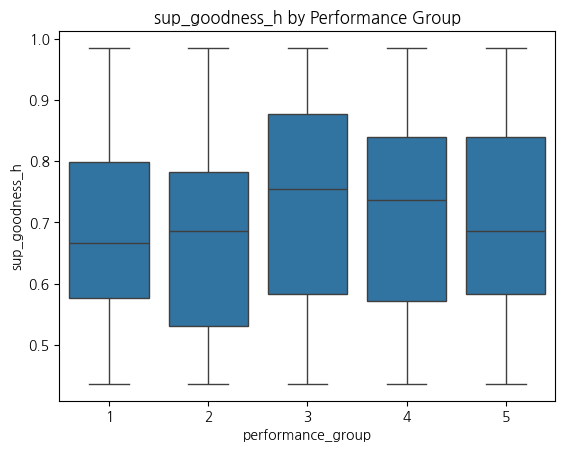

In [ ]:
sns.boxplot(x='performance_group', y='sup_goodness_h', data=recent_df)
plt.title('sup_goodness_h by Performance Group')
plt.show()

# 3. 생산성과 관련 있는 지표 확인

## 전처리

In [ ]:
recent_df.columns

Index(['sub_ID', 'sub_fname', 'sub_lname', 'sub_age', 'sub_sex', 'sub_shift',
       'sub_team', 'sub_role', 'sub_coll_IDs', 'sub_colls_same_sex_prtn',
       'sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h',
       'sub_dexterity_h', 'sub_sociality_h', 'sub_goodness_h',
       'sub_strength_h', 'sub_openmindedness_h', 'sub_workstyle_h', 'sup_ID',
       'sup_fname', 'sup_lname', 'sup_age', 'sup_sub_age_diff', 'sup_sex',
       'sup_role', 'sup_commitment_h', 'sup_perceptiveness_h',
       'sup_goodness_h', 'event_date', 'event_week_in_series',
       'event_day_in_series', 'event_weekday_num', 'event_weekday_name',
       'behav_comptype_h', 'behav_cause_h', 'actual_efficacy_h',
       'record_comptype', 'record_cause', 'recorded_efficacy',
       'recorded_note_from_sup', 'record_conf_matrix_h', 'performance_group',
       'event_month'],
      dtype='object')

In [ ]:
efficacy_df = recent_df[(recent_df['behav_comptype_h'] == 'Efficacy')]

In [ ]:
efficacy_df.shape

(63388, 44)

In [ ]:
efficacy_df.drop(columns=['sub_fname', 'sub_lname', 'sub_shift', 'sub_team', 'sub_role', 'sub_coll_IDs', 'sub_workstyle_h', 'sup_ID', 'sup_fname', 'sup_lname', 'sup_sex','sup_role', 'event_week_in_series','event_day_in_series',  'behav_comptype_h', 'behav_cause_h',  'record_comptype', 'record_cause', 'recorded_efficacy', 'recorded_note_from_sup', 'record_conf_matrix_h'], inplace=True)

<ipython-input-79-0d35fdc53d12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  efficacy_df.drop(columns=['sub_fname', 'sub_lname', 'sub_shift', 'sub_team', 'sub_role', 'sub_coll_IDs', 'sub_workstyle_h', 'sup_ID', 'sup_fname', 'sup_lname', 'sup_sex','sup_role', 'event_week_in_series','event_day_in_series',  'behav_comptype_h', 'behav_cause_h',  'record_comptype', 'record_cause', 'recorded_efficacy', 'recorded_note_from_sup', 'record_conf_matrix_h'], inplace=True)


In [ ]:
efficacy_df.head(2)

,sub_ID,sub_age,sub_sex,sub_colls_same_sex_prtn,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,...,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,event_date,event_weekday_num,event_weekday_name,actual_efficacy_h,performance_group,event_month
2167,98000001,40,F,0.714286,0.895,1.000,0.659,0.592,0.799,0.501,...,-16.0,0.842,0.948,0.971,2022-01-03,0,Monday,0.618,1,2022-01-01
2169,98000002,61,F,0.714286,0.752,0.563,0.449,0.766,0.872,0.655,...,-37.0,0.842,0.948,0.971,2022-01-03,0,Monday,0.863,5,2022-01-01


In [ ]:
# 남자 0, 여자 1
efficacy_df['sub_sex'] = (efficacy_df['sub_sex'] == 'F').astype(int)

<ipython-input-81-9e4b6f65ce8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  efficacy_df['sub_sex'] = (efficacy_df['sub_sex'] == 'F').astype(int)


In [ ]:
# 요일 숫자로 변환
weekday_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}

efficacy_df['event_weekday_name'] = efficacy_df['event_weekday_name'].map(weekday_mapping)

<ipython-input-82-7cbf2a148937>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  efficacy_df['event_weekday_name'] = efficacy_df['event_weekday_name'].map(weekday_mapping)


In [ ]:
efficacy_df.dtypes

,0
sub_ID,int64
sub_age,int64
sub_sex,int64
sub_colls_same_sex_prtn,float64
sub_health_h,float64
sub_commitment_h,float64
sub_perceptiveness_h,float64
sub_dexterity_h,float64
sub_sociality_h,float64
sub_goodness_h,float64


## 상관관계 확인

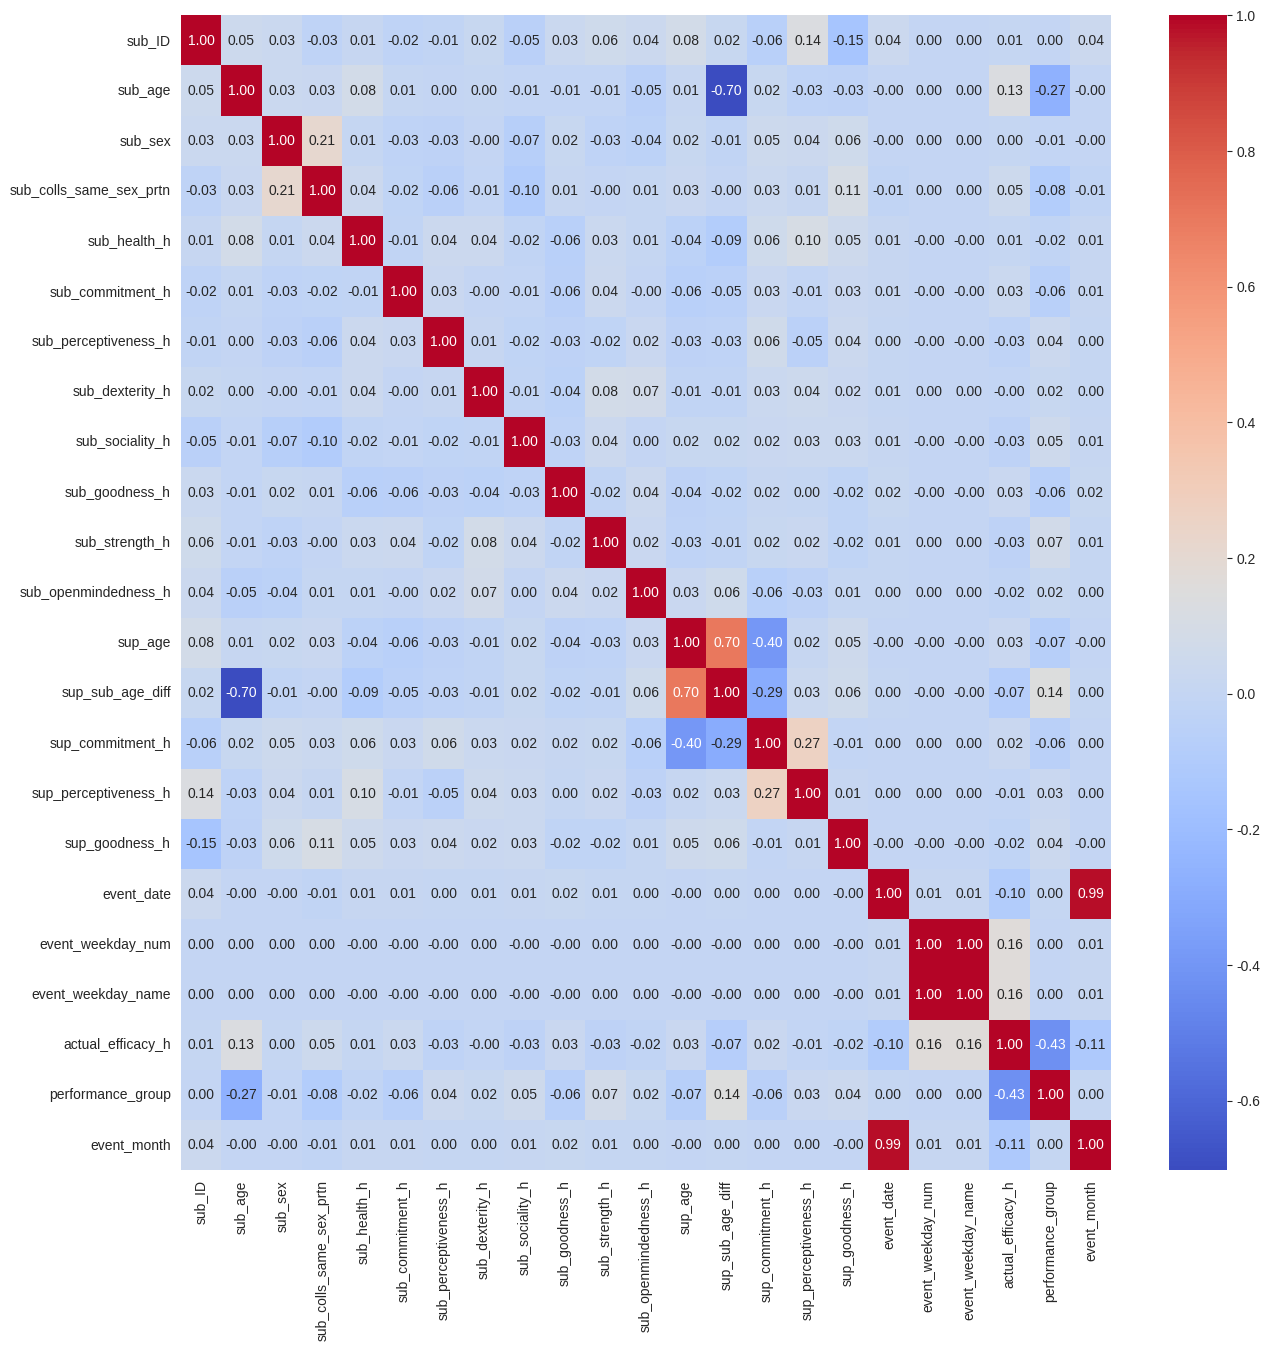

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(efficacy_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

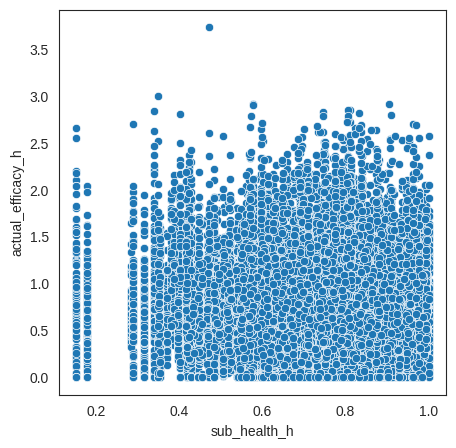

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=efficacy_df, x='sub_health_h', y='actual_efficacy_h')
plt.show()

### 개인의 역량과 생산성 평균 상관관계

In [ ]:
# sub_id별로 역량, efficacy 평균을 낸 다음 해당 데이터로 상관관계 분석
sub_com_eff_avg = recent_df.groupby(by='sub_ID')[['sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h', 'sub_dexterity_h', 'sub_sociality_h', 'sub_goodness_h', 'sub_strength_h', 'sub_openmindedness_h', 'actual_efficacy_h']].mean().reset_index()
sub_com_eff_avg.head(2)

,sub_ID,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,actual_efficacy_h
0,98000001,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,0.853310
1,98000002,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,0.503754


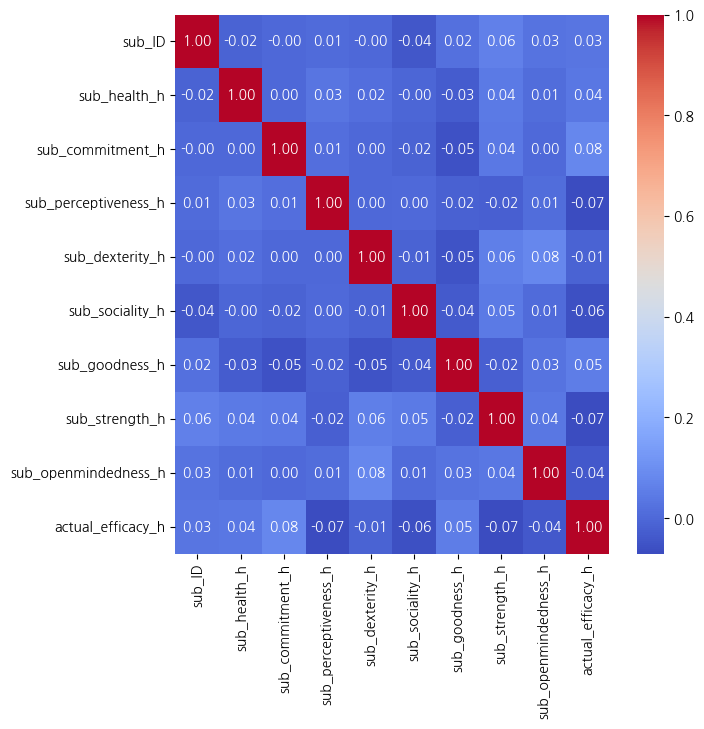

In [ ]:
plt.figure(figsize=(7, 7))
sns.heatmap(sub_com_eff_avg.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

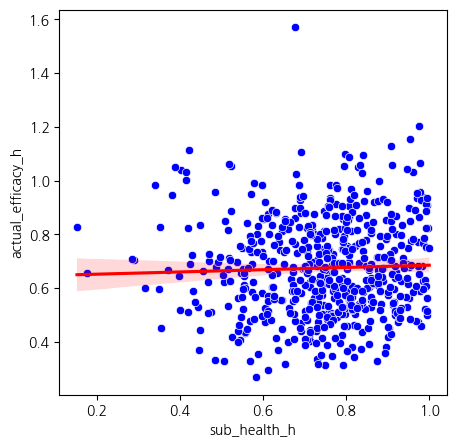

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=sub_com_eff_avg, x='sub_health_h', y='actual_efficacy_h', color='blue')
sns.regplot(data=sub_com_eff_avg, x='sub_health_h', y='actual_efficacy_h',
            scatter=False, line_kws={'color': 'red'})
plt.show()

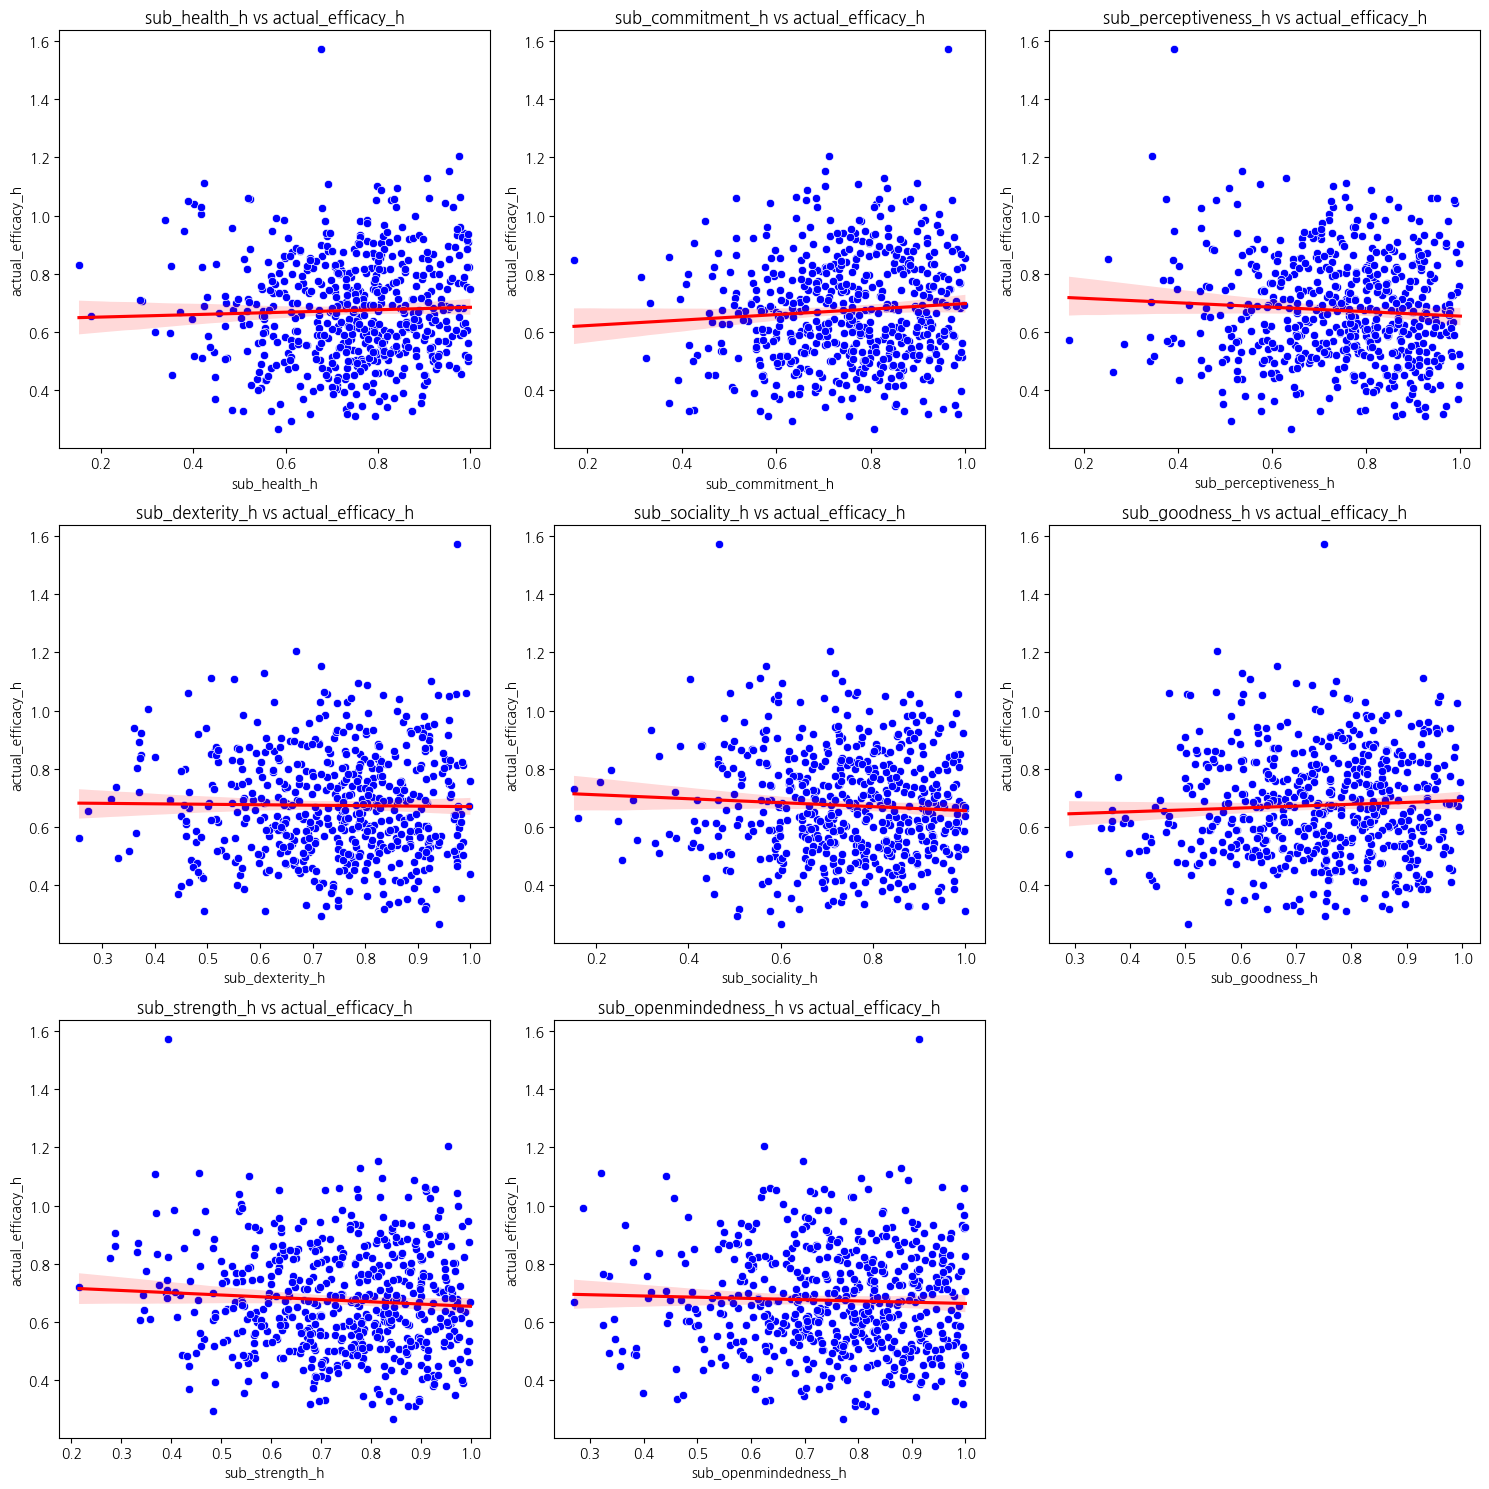

In [ ]:
x_vars = [
    'sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h',
    'sub_dexterity_h', 'sub_sociality_h', 'sub_goodness_h',
    'sub_strength_h', 'sub_openmindedness_h'
]

# 그래프 사이즈 설정
plt.figure(figsize=(15, 15))

# 각 변수에 대해 subplot으로 그림
for i, x in enumerate(x_vars):
    plt.subplot(3, 3, i + 1)  # 3행 3열 배열, 인덱스는 1부터 시작
    sns.scatterplot(data=sub_com_eff_avg, x=x, y='actual_efficacy_h', color='blue')
    sns.regplot(data=sub_com_eff_avg, x=x, y='actual_efficacy_h',
                scatter=False, line_kws={'color': 'red'})
    plt.title(f'{x} vs actual_efficacy_h')

plt.tight_layout()
plt.show()

### 차원 축소 후 시각화

<Axes: xlabel='pca_comp', ylabel='actual_efficacy_h'>

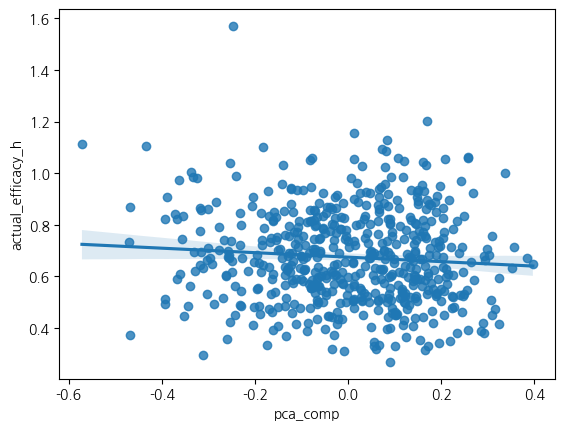

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
sub_com_eff_avg['pca_comp'] = pca.fit_transform(sub_com_eff_avg[x_vars])
sns.regplot(data=sub_com_eff_avg, x='pca_comp', y='actual_efficacy_h')

### 예측모델 기반 피처 중요도 분석

<Axes: >

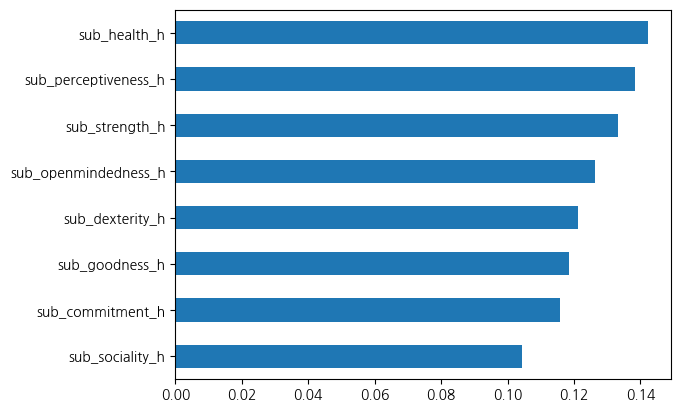

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = sub_com_eff_avg[x_vars]
y = sub_com_eff_avg['actual_efficacy_h']

model = RandomForestRegressor()
model.fit(X, y)

# 중요도 시각화
importances = pd.Series(model.feature_importances_, index=x_vars)
importances.sort_values().plot(kind='barh')

### 클러스터링 기반

<Axes: xlabel='cluster', ylabel='actual_efficacy_h'>

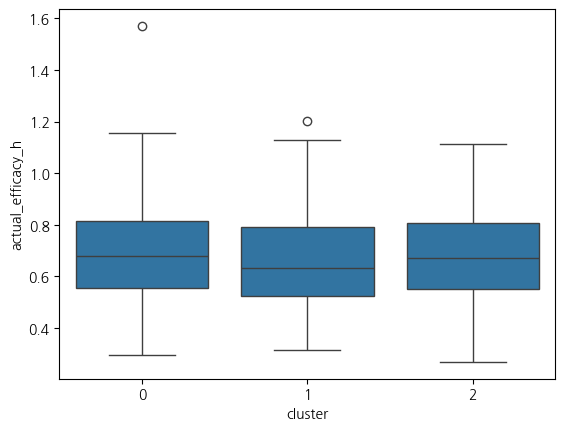

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
sub_com_eff_avg['cluster'] = kmeans.fit_predict(sub_com_eff_avg[x_vars])
sns.boxplot(data=sub_com_eff_avg, x='cluster', y='actual_efficacy_h')

# 4. 시간에 따른 성과 변화 분석

- 어떤 순서로 해야하지?
    - 1) recent_df['performance_group'] = 1인 데이터 추출
    - 2) 1)의 성과가 가장 좋은 sub_ID의 event_date, event_week, event_weekday_name, behav_comptype_h, actual_efficacy_h 여정 확인 & 시각화
    - 3) 2)에서 성과가 가장 좋은 순간 앞뒤의 이벤트 확인
    - 4) 2)에서 성과가 떨어지는 순간 앞뒤의 이벤트 확인
    - 5) 위의 순서를 여러 명의 sub_ID의 여정을 반복 추출하면서 일반화할 수 있는 결론 추출

## 생산성 1위

In [ ]:
# 1) recent_df['performance_group'] = 1인 데이터 추출
high_performers_df = recent_df[(recent_df['performance_group'] == 1)]
high_performers_df.shape

(26505, 43)

In [ ]:
# 2) 성과가 가장 높은 id 확인
top_performer = high_performers_df.loc[high_performers_df['actual_efficacy_h'].idxmax()]
top_performer_id = top_performer['sub_ID']
print(top_performer_id)

98000727


In [ ]:
# 3) top_performer sub_ID의 event_date, event_week, event_weekday_name, behav_comptype_h, actual_efficacy_h 여정 확인 & 시각화
top_performer_df = high_performers_df[(high_performers_df['sub_ID'] == top_performer_id)]
top_performer_df = top_performer_df[['sub_ID', 'sub_coll_IDs', 'sub_colls_same_sex_prtn', 'event_date', 'event_weekday_num', 'event_weekday_name', 'behav_comptype_h', 'behav_cause_h', 'actual_efficacy_h']]

In [ ]:
top_performer_df.shape

(260, 9)

In [ ]:
top_performer_df.head(20)

,sub_ID,sub_coll_IDs,sub_colls_same_sex_prtn,event_date,event_weekday_num,event_weekday_name,behav_comptype_h,behav_cause_h,actual_efficacy_h
1071,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2021-12-30,3,Thursday,Presence,NaN,NaN
1072,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2021-12-30,3,Thursday,Efficacy,NaN,1.336
2150,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2021-12-31,4,Friday,Presence,NaN,NaN
2151,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2021-12-31,4,Friday,Efficacy,NaN,3.068
3208,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2022-01-03,0,Monday,Presence,NaN,NaN
3209,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2022-01-03,0,Monday,Efficacy,NaN,0.621
4250,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2022-01-04,1,Tuesday,Presence,NaN,NaN
4251,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2022-01-04,1,Tuesday,Efficacy,NaN,1.031
5297,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2022-01-05,2,Wednesday,Presence,NaN,NaN
5298,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2022-01-05,2,Wednesday,Efficacy,NaN,1.110


In [ ]:
# behave_comptype_h 가 Presence인 항목 삭제
top_performer_df = top_performer_df[(top_performer_df['behav_comptype_h'] != 'Presence')]
top_performer_df.reset_index(inplace=True)
top_performer_df.shape

(142, 10)

In [ ]:
top_performer_df.head(50)

,index,sub_ID,sub_coll_IDs,sub_colls_same_sex_prtn,event_date,event_weekday_num,event_weekday_name,behav_comptype_h,behav_cause_h,actual_efficacy_h
0,1072,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2021-12-30,3,Thursday,Efficacy,NaN,1.336
1,2151,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2021-12-31,4,Friday,Efficacy,NaN,3.068
2,3209,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2022-01-03,0,Monday,Efficacy,NaN,0.621
3,4251,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2022-01-04,1,Tuesday,Efficacy,NaN,1.031
4,5298,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2022-01-05,2,Wednesday,Efficacy,NaN,1.110
5,6339,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2022-01-06,3,Thursday,Efficacy,NaN,0.961
6,7394,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2022-01-07,4,Friday,Efficacy,NaN,1.323
7,8460,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2022-01-10,0,Monday,Efficacy,NaN,1.177
8,9501,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2022-01-11,1,Tuesday,Efficacy,NaN,0.902
9,10552,98000727,"[98000166, 98000167, 98000168, 98000170, 98000...",0.578947,2022-01-12,2,Wednesday,Efficacy,NaN,0.717


In [ ]:
top_performer_df['behav_comptype_h'].value_counts()

,count
behav_comptype_h,
Efficacy,118
Idea,7
Sacrifice,5
Feat,3
Teamwork,3
Disruption,2
Absence,2
Lapse,1
Resignation,1


In [ ]:
avg_efficacy = top_performer_df['actual_efficacy_h'].mean()
avg_efficacy

np.float64(1.1129915254237288)

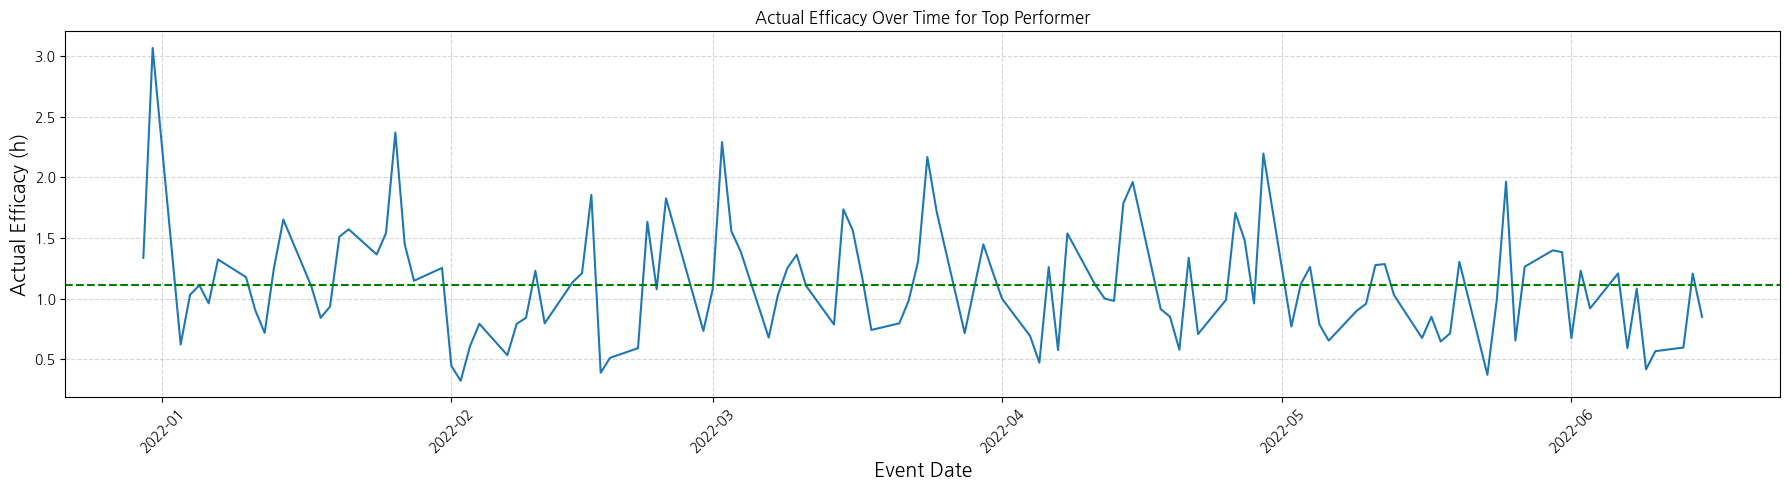

In [ ]:
# actual_efficacy_h 시각화

plt.figure(figsize=(18, 5))
sns.lineplot(data=top_performer_df, x='event_date', y='actual_efficacy_h')

# 평균선 추가
avg_efficacy = top_performer_df['actual_efficacy_h'].mean()
plt.axhline(avg_efficacy, color='green', linestyle='--', label=f'Mean ({avg_efficacy:.2f})')

plt.title('Actual Efficacy Over Time for Top Performer')
plt.xlabel('Event Date', fontsize=14)
plt.ylabel('Actual Efficacy (h)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Teamwork 앞뒤로 efficacy 확인
teamwork_idxs = top_performer_df[top_performer_df['behav_comptype_h'] == 'Feat'].index

# 5일 전후 생산성 추출
results = []

for idx in teamwork_idxs:
    # 범위를 벗어나지 않는지 확인
    if idx >= 5 and idx <= len(top_performer_df) - 6:
        pre_efficacy = top_performer_df.loc[idx-5:idx-1, 'actual_efficacy_h'].dropna()
        post_efficacy = top_performer_df.loc[idx+1:idx+5, 'actual_efficacy_h'].dropna()

        if len(pre_efficacy) > 0 and len(post_efficacy) > 0:
            results.append({
                'event_date': top_performer_df.loc[idx, 'event_date'],
                'pre_mean': pre_efficacy.mean(),
                'post_mean': post_efficacy.mean(),
                'change': post_efficacy.mean() - pre_efficacy.mean()
            })

change_df = pd.DataFrame(results)

In [ ]:
print("평균 변화량 (5일 후 - 5일 전):", change_df['change'].mean())

평균 변화량 (5일 후 - 5일 전): -0.021233333333333288


<mark> teamwork 후 생산성이 떨어지는 경향이 있으나 크지 않음

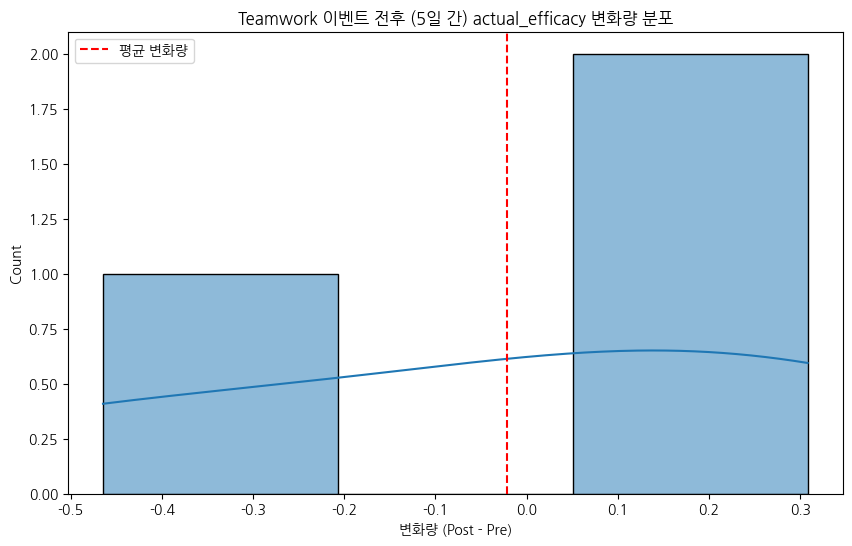

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(change_df['change'], kde=True)
plt.axvline(change_df['change'].mean(), color='red', linestyle='--', label='평균 변화량')
plt.title("Teamwork 이벤트 전후 (5일 간) actual_efficacy 변화량 분포")
plt.xlabel("변화량 (Post - Pre)")
plt.legend()
plt.show()

In [ ]:
# 이벤트별 생산성 변화량 비교
event_types = top_performer_df['behav_comptype_h'].dropna().unique()
all_results = []

for event in event_types:
    idxs = top_performer_df[top_performer_df['behav_comptype_h'] == event].index
    for idx in idxs:
        if idx >= 5 and idx <= len(top_performer_df) - 6:
            pre = top_performer_df.loc[idx-5:idx-1, 'actual_efficacy_h'].dropna()
            post = top_performer_df.loc[idx+1:idx+5, 'actual_efficacy_h'].dropna()
            if len(pre) > 0 and len(post) > 0:
                all_results.append({
                    'event': event,
                    'pre_mean': pre.mean(),
                    'post_mean': post.mean(),
                    'change': post.mean() - pre.mean()
                })

event_change_df = pd.DataFrame(all_results)

In [ ]:
event_change_df

,event,pre_mean,post_mean,change
0,Efficacy,1.4332,1.075200,-0.358000
1,Efficacy,1.3582,1.141000,-0.217200
2,Efficacy,1.0092,1.132000,0.122800
3,Efficacy,1.1204,1.181750,0.061350
4,Efficacy,1.0946,1.212750,0.118150
...,...,...,...,...
127,Disruption,0.9910,1.282000,0.291000
128,Disruption,1.3938,1.127333,-0.266467
129,Absence,1.2820,1.367667,0.085667
130,Absence,1.4760,1.089500,-0.386500


<ipython-input-359-81b467059a1f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=event_change_df, x='event', y='change', palette='Set2')


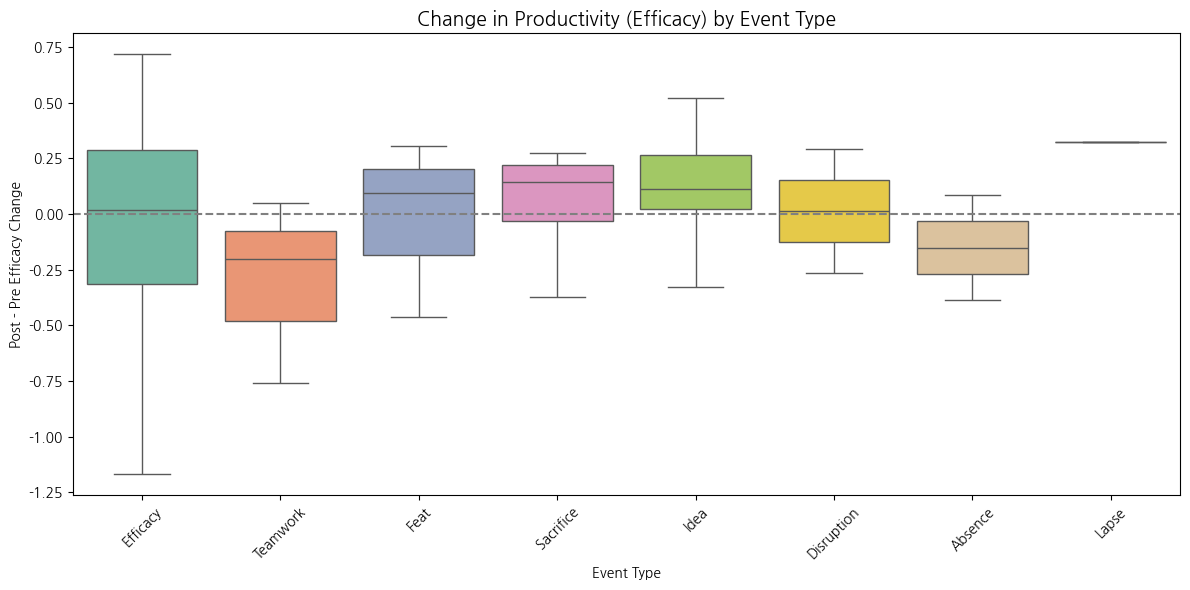

In [ ]:
# 이벤트별 생산성 변화량 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(data=event_change_df, x='event', y='change', palette='Set2')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Change in Productivity (Efficacy) by Event Type', fontsize=14)
plt.ylabel('Post - Pre Efficacy Change')
plt.xlabel('Event Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 0보다 위 → 이벤트 후 생산성 상승
- 0보다 아래 → 이벤트 후 생산성 하락
- 박스 길이 → 일관성(변동성)

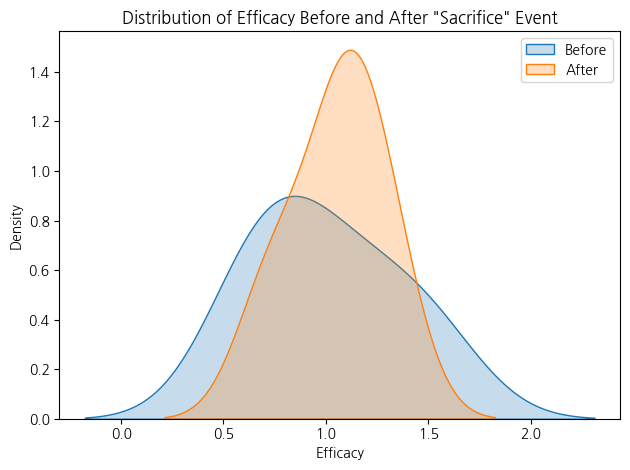

In [ ]:
# 이벤트별 사전-사후 분포
feat_df = event_change_df[event_change_df['event'] == 'Sacrifice']

sns.kdeplot(feat_df['pre_mean'], label='Before', fill=True)
sns.kdeplot(feat_df['post_mean'], label='After', fill=True)
plt.title('Distribution of Efficacy Before and After "Sacrifice" Event')
plt.xlabel('Efficacy')
plt.legend()
plt.tight_layout()
plt.show()

## 생산성 2위

In [ ]:
df = high_performers_df.groupby(by='sub_ID')['actual_efficacy_h'].mean().sort_values(ascending=False).reset_index()
df.head(15)

,sub_ID,actual_efficacy_h
0,98000495,1.570600
1,98000317,1.203500
2,98000646,1.154248
3,98000484,1.128520
4,98000727,1.112992
5,98000717,1.107087
6,98000178,1.100545
7,98000463,1.094024
8,98000756,1.086407
9,98000741,1.063647


In [ ]:
# 3) top_performer sub_ID의 event_date, event_week, event_weekday_name, behav_comptype_h, actual_efficacy_h 여정 확인 & 시각화
second_performer_df = high_performers_df[(high_performers_df['sub_ID'] == 98000294)]
second_performer_df = second_performer_df[['sub_ID', 'event_date', 'event_weekday_num', 'event_weekday_name', 'behav_comptype_h', 'behav_cause_h', 'actual_efficacy_h']]

In [ ]:
second_performer_df.shape

(274, 7)

In [ ]:
# behave_comptype_h 가 Presence인 항목 삭제
second_performer_df = second_performer_df[(second_performer_df['behav_comptype_h'] != 'Presence')]
second_performer_df.reset_index(inplace=True)
second_performer_df.shape

(145, 8)

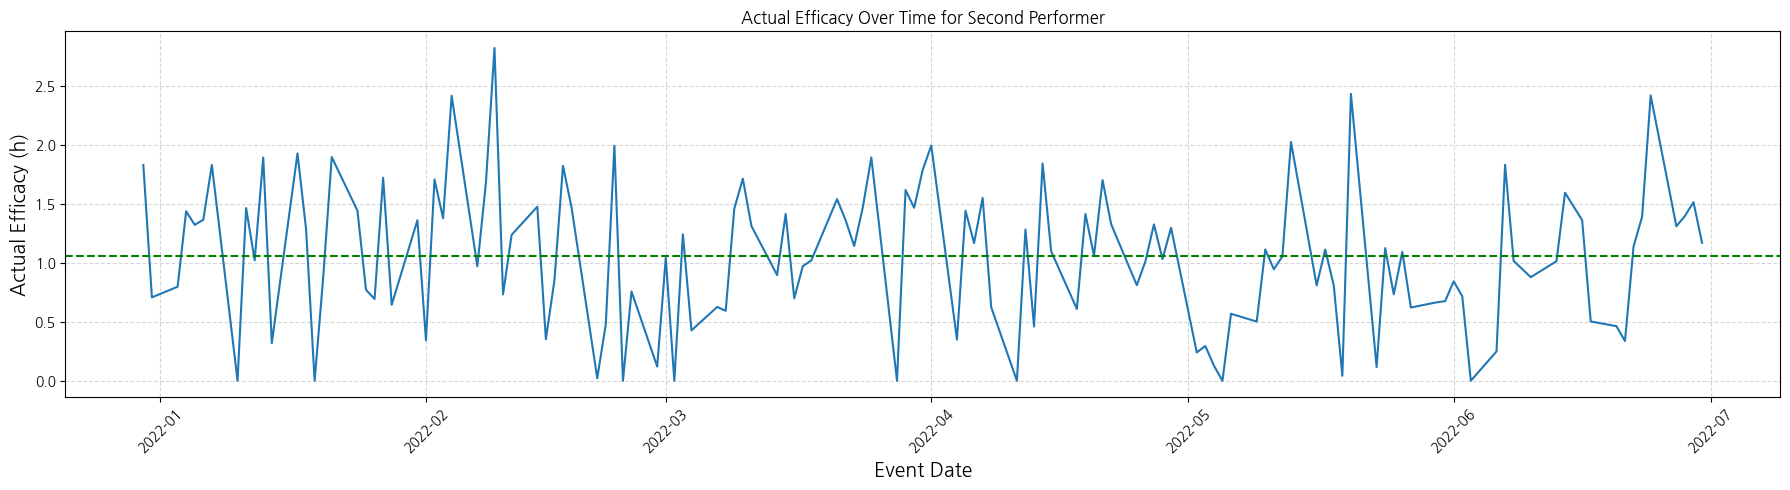

In [ ]:
# actual_efficacy_h 시각화

avg_efficacy = second_performer_df['actual_efficacy_h'].mean()
avg_efficacy

plt.figure(figsize=(18, 5))
sns.lineplot(data=second_performer_df, x='event_date', y='actual_efficacy_h')

# 평균선 추가
avg_efficacy = second_performer_df['actual_efficacy_h'].mean()
plt.axhline(avg_efficacy, color='green', linestyle='--', label=f'Mean ({avg_efficacy:.2f})')

plt.title('Actual Efficacy Over Time for Second Performer')
plt.xlabel('Event Date', fontsize=14)
plt.ylabel('Actual Efficacy (h)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
second_performer_df['behav_comptype_h'].value_counts()

,count
behav_comptype_h,
Efficacy,129
Sacrifice,5
Teamwork,4
Idea,2
Feat,2
Absence,2
Lapse,1


In [ ]:
# Teamwork 앞뒤로 efficacy 확인
teamwork_idxs = second_performer_df[second_performer_df['behav_comptype_h'] == 'Absence'].index

# 5일 전후 생산성 추출
results = []

for idx in teamwork_idxs:
    # 범위를 벗어나지 않는지 확인
    if idx >= 5 and idx <= len(second_performer_df) - 6:
        pre_efficacy = second_performer_df.loc[idx-5:idx-1, 'actual_efficacy_h'].dropna()
        post_efficacy = second_performer_df.loc[idx+1:idx+5, 'actual_efficacy_h'].dropna()

        if len(pre_efficacy) > 0 and len(post_efficacy) > 0:
            results.append({
                'event_date': second_performer_df.loc[idx, 'event_date'],
                'pre_mean': pre_efficacy.mean(),
                'post_mean': post_efficacy.mean(),
                'change': post_efficacy.mean() - pre_efficacy.mean()
            })

change_df = pd.DataFrame(results)

print("평균 변화량 (5일 후 - 5일 전):", change_df['change'].mean())

평균 변화량 (5일 후 - 5일 전): 0.04202500000000009


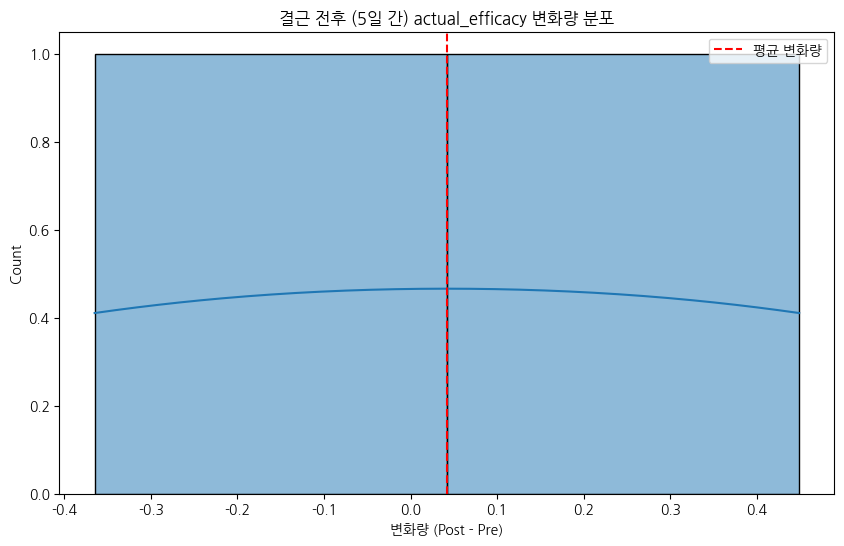

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(change_df['change'], kde=True)
plt.axvline(change_df['change'].mean(), color='red', linestyle='--', label='평균 변화량')
plt.title("결근 전후 (5일 간) actual_efficacy 변화량 분포")
plt.xlabel("변화량 (Post - Pre)")
plt.legend()
plt.show()

# 6. 특정 이벤트 빈도 기준 생산성 추이

In [ ]:
# 고성과그룹의 직원별 Teamwork/Sacrifice 이벤트 수 세기
event_counts = high_performers_df[high_performers_df['behav_comptype_h'].isin(['Teamwork', 'Sacrifice'])] \
    .groupby(['sub_ID', 'behav_comptype_h']) \
    .size().unstack(fill_value=0).reset_index()

In [ ]:
event_counts

behav_comptype_h,sub_ID,Sacrifice,Teamwork,high_sacrifice,high_teamwork
0,98000001,3,6,False,True
1,98000013,3,4,False,False
2,98000018,6,2,True,False
3,98000024,4,3,False,False
4,98000026,6,2,True,False
...,...,...,...,...,...
101,98000756,1,1,False,False
102,98000758,5,5,True,True
103,98000759,1,1,False,False
104,98000761,5,2,True,False


In [ ]:
# 상위 그룹 기준 정의
sacrifice_threshold = event_counts['Sacrifice'].quantile(0.75)
teamwork_threshold = event_counts['Teamwork'].quantile(0.75)

# 그룹 라벨링
event_counts['high_sacrifice'] = event_counts['Sacrifice'] >= sacrifice_threshold
event_counts['high_teamwork'] = event_counts['Teamwork'] >= teamwork_threshold

In [ ]:
merged = high_performers_df.merge(event_counts[['sub_ID', 'high_sacrifice', 'high_teamwork']], on='sub_ID', how='left')

# 날짜 기준 생산성 평균 (예: 주 단위)
merged['event_week'] = pd.to_datetime(merged['event_date']).dt.to_period('W').dt.to_timestamp()

# Sacrifice 기준 비교
sac_curve = merged.groupby(['event_week', 'high_teamwork'])['actual_efficacy_h'].mean().reset_index()

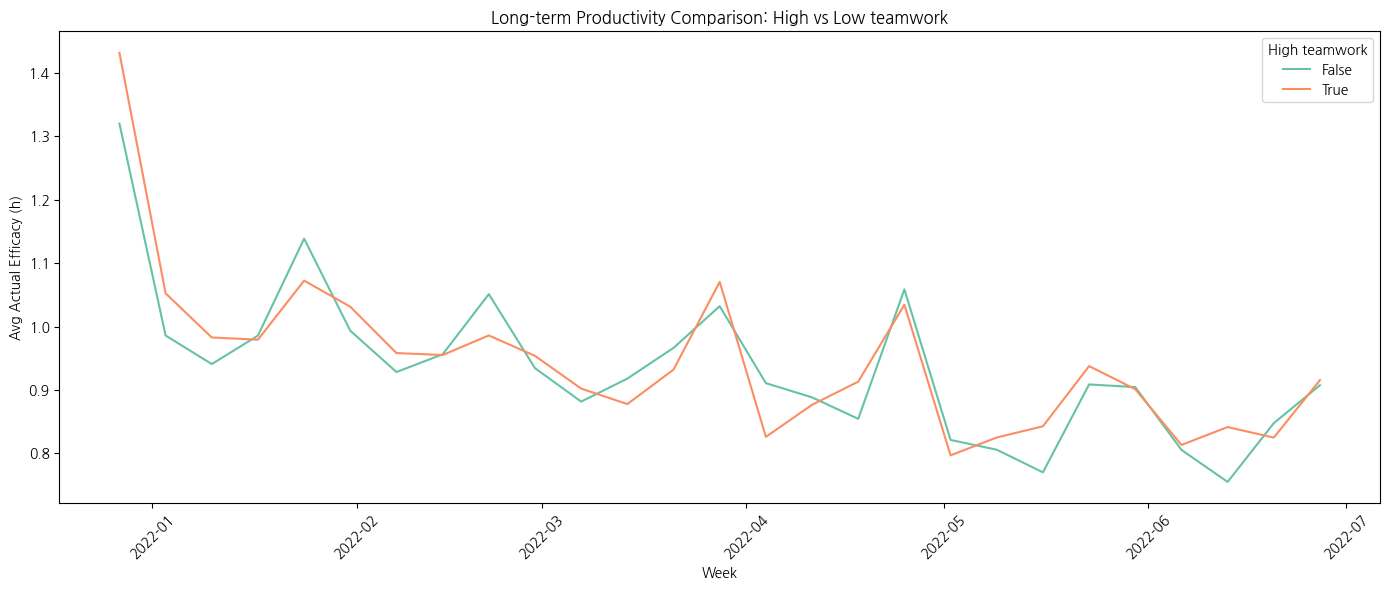

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=sac_curve, x='event_week', y='actual_efficacy_h', hue='high_teamwork', palette='Set2')
plt.title('Long-term Productivity Comparison: High vs Low teamwork')
plt.ylabel('Avg Actual Efficacy (h)')
plt.xlabel('Week')
plt.legend(title='High teamwork')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 상위 25%, 하위 25% 비교

### 팀워크

In [ ]:
# 상하위 25% 임계값 계산
teamwork_q75 = event_counts['Teamwork'].quantile(0.75)
teamwork_q25 = event_counts['Teamwork'].quantile(0.25)

sacrifice_q75 = event_counts['Sacrifice'].quantile(0.75)
sacrifice_q25 = event_counts['Sacrifice'].quantile(0.25)

In [ ]:
# teamwork 상하위 그룹
def teamwork_group(val):
    if val >= teamwork_q75:
        return 'high'
    elif val <= teamwork_q25:
        return 'low'
    else:
        return 'middle'

event_counts['teamwork_group'] = event_counts['Teamwork'].apply(teamwork_group)

In [ ]:
# 병합
merged = high_performers_df.merge(event_counts[['sub_ID', 'teamwork_group']], on='sub_ID', how='left')

# 주 단위 주차
merged['event_week'] = pd.to_datetime(merged['event_date']).dt.to_period('W').dt.to_timestamp()

# 상하위 그룹만 필터링
filtered = merged[merged['teamwork_group'].isin(['high', 'low'])]

# 그룹별 주차별 생산성 평균
curve = filtered.groupby(['event_week', 'teamwork_group'])['actual_efficacy_h'].mean().reset_index()

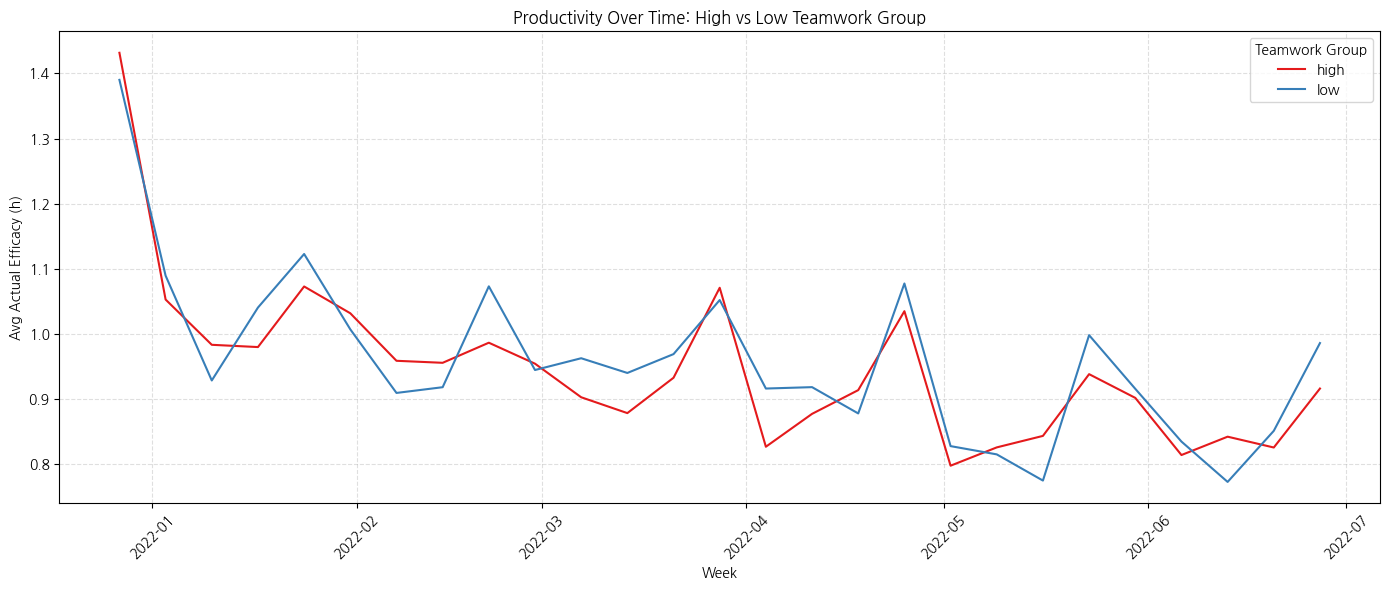

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=curve, x='event_week', y='actual_efficacy_h', hue='teamwork_group', palette='Set1')
plt.title('Productivity Over Time: High vs Low Teamwork Group')
plt.ylabel('Avg Actual Efficacy (h)')
plt.xlabel('Week')
plt.legend(title='Teamwork Group')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### 희생

In [ ]:
# Sacrifice 상하위 25% 기준 계산
sacrifice_q75 = event_counts['Sacrifice'].quantile(0.75)
sacrifice_q25 = event_counts['Sacrifice'].quantile(0.25)

# 그룹 구분 함수 정의
def sacrifice_group(val):
    if val >= sacrifice_q75:
        return 'high'
    elif val <= sacrifice_q25:
        return 'low'
    else:
        return 'middle'

# 적용
event_counts['sacrifice_group'] = event_counts['Sacrifice'].apply(sacrifice_group)

In [ ]:
# 병합
merged_sac = high_performers_df.merge(event_counts[['sub_ID', 'sacrifice_group']], on='sub_ID', how='left')

# 주차 생성
merged_sac['event_week'] = pd.to_datetime(merged_sac['event_date']).dt.to_period('W').dt.to_timestamp()

In [ ]:
# 상하위 그룹만 필터링
filtered_sac = merged_sac[merged_sac['sacrifice_group'].isin(['high', 'low'])]

# 주차별 평균 efficacy 계산
sac_curve = filtered_sac.groupby(['event_week', 'sacrifice_group'])['actual_efficacy_h'].mean().reset_index()

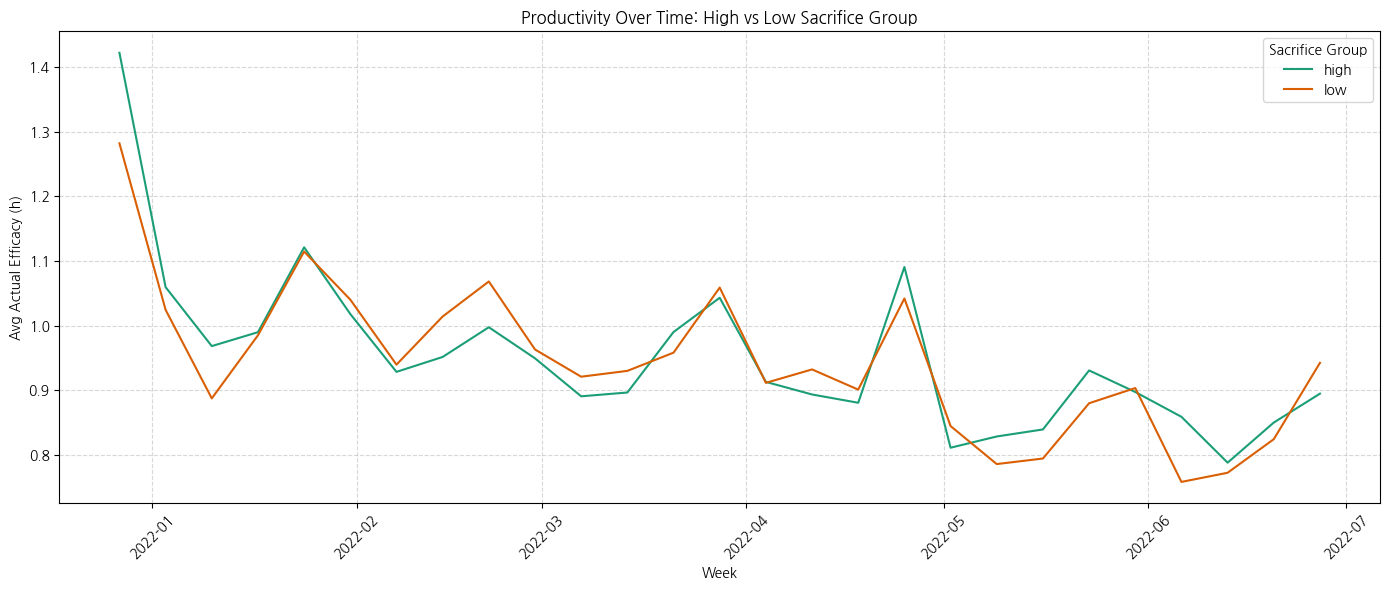

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=sac_curve, x='event_week', y='actual_efficacy_h', hue='sacrifice_group', palette='Dark2')
plt.title('Productivity Over Time: High vs Low Sacrifice Group')
plt.ylabel('Avg Actual Efficacy (h)')
plt.xlabel('Week')
plt.legend(title='Sacrifice Group')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. 생산성 기준 관리 필요 고성과자 분류

In [ ]:
high_performers_df.head(2)

,sub_ID,sub_fname,sub_lname,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_coll_IDs,sub_colls_same_sex_prtn,...,event_weekday_name,behav_comptype_h,behav_cause_h,actual_efficacy_h,record_comptype,record_cause,recorded_efficacy,recorded_note_from_sup,record_conf_matrix_h,performance_group
0,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,...,Thursday,Presence,NaN,NaN,Presence,NaN,NaN,NaN,NaN,1
1,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,...,Thursday,Efficacy,NaN,1.563,Efficacy,NaN,1.9,NaN,NaN,1


In [ ]:
high_performers_df.columns

Index(['sub_ID', 'sub_fname', 'sub_lname', 'sub_age', 'sub_sex', 'sub_shift',
       'sub_team', 'sub_role', 'sub_coll_IDs', 'sub_colls_same_sex_prtn',
       'sub_health_h', 'sub_commitment_h', 'sub_perceptiveness_h',
       'sub_dexterity_h', 'sub_sociality_h', 'sub_goodness_h',
       'sub_strength_h', 'sub_openmindedness_h', 'sub_workstyle_h', 'sup_ID',
       'sup_fname', 'sup_lname', 'sup_age', 'sup_sub_age_diff', 'sup_sex',
       'sup_role', 'sup_commitment_h', 'sup_perceptiveness_h',
       'sup_goodness_h', 'event_date', 'event_week_in_series',
       'event_day_in_series', 'event_weekday_num', 'event_weekday_name',
       'behav_comptype_h', 'behav_cause_h', 'actual_efficacy_h',
       'record_comptype', 'record_cause', 'recorded_efficacy',
       'recorded_note_from_sup', 'record_conf_matrix_h', 'performance_group'],
      dtype='object')

In [ ]:
high_performers_df.gropuby('sub_ID').agg

In [ ]:
high_performer_avg_efficacy = high_performers_df.groupby('sub_ID').agg({'actual_efficacy_h': 'mean'}).reset_index()

In [ ]:
high_performer_avg_efficacy['actual_efficacy_h'].sort_values(ascending=False)

,actual_efficacy_h
66,1.570600
41,1.203500
84,1.154248
61,1.128520
96,1.112992
...,...
24,0.834320
23,0.834216
31,0.833617
42,0.830934


In [ ]:
efficacy_top_performers = high_performers_df[high_performers_df['actual_efficacy_h'] >= 2]

In [ ]:
efficacy_top_performers.shape

(221, 43)

In [ ]:
top_df = efficacy_top_performers.groupby(by = 'sub_ID').agg({'actual_efficacy_h':'mean'}).reset_index()

In [ ]:
top_df.head(2)

,sub_ID,actual_efficacy_h
0,98000001,2.1100
1,98000013,2.0955


In [ ]:
top_df.mean()

,0
sub_ID,9.800039e+07
actual_efficacy_h,2.261322e+00


In [ ]:
merge_top_df = pd.merge(top_df, high_performers_df, on='sub_ID', how='inner')

In [ ]:
merge_top_df['sub_'].mean()

np.float64(2.2608749879239105)

In [ ]:
merge_top_df.columns

Index(['sub_ID', 'actual_efficacy_h_x', 'sub_fname', 'sub_lname', 'sub_age',
       'sub_sex', 'sub_shift', 'sub_team', 'sub_role', 'sub_coll_IDs',
       'sub_colls_same_sex_prtn', 'sub_health_h', 'sub_commitment_h',
       'sub_perceptiveness_h', 'sub_dexterity_h', 'sub_sociality_h',
       'sub_goodness_h', 'sub_strength_h', 'sub_openmindedness_h',
       'sub_workstyle_h', 'sup_ID', 'sup_fname', 'sup_lname', 'sup_age',
       'sup_sub_age_diff', 'sup_sex', 'sup_role', 'sup_commitment_h',
       'sup_perceptiveness_h', 'sup_goodness_h', 'event_date',
       'event_week_in_series', 'event_day_in_series', 'event_weekday_num',
       'event_weekday_name', 'behav_comptype_h', 'behav_cause_h',
       'actual_efficacy_h_y', 'record_comptype', 'record_cause',
       'recorded_efficacy', 'recorded_note_from_sup', 'record_conf_matrix_h',
       'performance_group'],
      dtype='object')

# 8. 성과 급등/급락 중인 직원

- 최근 1개월 efficacy 평균 구하기
- 최근 1개월 제외 efficacy 평균 구하기
- efficacy 평균이 지난 평균 대비 많이 올라간 5인
- efficacy 평균이 지난 평균 대비 많이 떨어진 5인

In [ ]:
recent_df.head(2)

,sub_ID,sub_fname,sub_lname,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_coll_IDs,sub_colls_same_sex_prtn,...,event_weekday_name,behav_comptype_h,behav_cause_h,actual_efficacy_h,record_comptype,record_cause,recorded_efficacy,recorded_note_from_sup,record_conf_matrix_h,performance_group
0,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,...,Thursday,Presence,NaN,NaN,Presence,NaN,NaN,NaN,NaN,1
1,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714286,...,Thursday,Efficacy,NaN,1.563,Efficacy,NaN,1.9,NaN,NaN,1


In [ ]:
# 월 정보 컬럼 추가
recent_df['month'] = recent_df['event_date'].dt.month

# 1~5월 평균 efficacy
jan_to_may = recent_df[recent_df['month'].between(1, 5)]
jan_may_avg = jan_to_may.groupby('sub_ID')['actual_efficacy_h'].mean().rename('avg_1_5')

# 6월 평균 efficacy
june = recent_df[recent_df['month'] == 6]
june_avg = june.groupby('sub_ID')['actual_efficacy_h'].mean().rename('avg_6')

# 두 결과 병합
efficacy_change = pd.concat([jan_may_avg, june_avg], axis=1).dropna()

# 변화량 계산
efficacy_change['diff'] = efficacy_change['avg_6'] - efficacy_change['avg_1_5']

# 많이 오른 5명
top_5_risers = efficacy_change.sort_values(by='diff', ascending=False).head(5)

# 많이 떨어진 5명
top_5_fallers = efficacy_change.sort_values(by='diff', ascending=True).head(5)

# 결과 확인
print("🔺 많이 오른 5명:")
print(top_5_risers)

print("\n🔻 많이 떨어진 5명:")
print(top_5_fallers)

🔺 많이 오른 5명:
           avg_1_5     avg_6      diff
sub_ID                                
98000072  0.575115  0.837318  0.262203
98000159  0.525990  0.772000  0.246010
98000784  0.336000  0.571273  0.235273
98000390  0.485068  0.695364  0.210296
98000079  0.480728  0.679409  0.198681

🔻 많이 떨어진 5명:
           avg_1_5     avg_6      diff
sub_ID                                
98000312  0.744972  0.379650 -0.365322
98000266  1.042654  0.680190 -0.362463
98000595  1.089510  0.739429 -0.350081
98000533  1.099703  0.777409 -0.322294
98000647  0.756118  0.450238 -0.305880


In [ ]:
# top 10명 sub_id 추출
top_10_ids = pd.concat([top_5_risers, top_5_fallers]).index.tolist()

# 원본에서 이 sub_id에 해당하는 사람 정보 추출 (6월 기준 가장 최신 데이터 한 줄만)
latest_info = (
    recent_df[recent_df['sub_ID'].isin(top_10_ids)]
    .sort_values(by='event_date', ascending=False)
    .drop_duplicates(subset='sub_ID')[['sub_ID', 'sub_fname', 'sub_lname', 'sub_shift', 'sub_team']]
    .set_index('sub_ID')
)

# 최종 병합
final_result = pd.concat([efficacy_change.loc[top_10_ids], latest_info], axis=1)

# 정렬 (diff 기준 오름차순 → 하락이 아래로)
final_result = final_result.sort_values(by='diff', ascending=False)

# 결과 출력
print(final_result)

           avg_1_5     avg_6      diff sub_fname  sub_lname sub_shift sub_team
sub_ID                                                                        
98000072  0.575115  0.837318  0.262203  Virginia  Kowalczyk   Shift 1   Team 3
98000159  0.525990  0.772000  0.246010    Carlos       Hunt   Shift 1   Team 7
98000784  0.336000  0.571273  0.235273    Dennis     Wilson   Shift 1   Team 1
98000390  0.485068  0.695364  0.210296      Eric    Schmidt   Shift 3  Team 19
98000079  0.480728  0.679409  0.198681    Thomas      Davis   Shift 1   Team 3
98000647  0.756118  0.450238 -0.305880    Marvin     Rivera   Shift 3  Team 21
98000533  1.099703  0.777409 -0.322294  Kathleen       Webb   Shift 1   Team 7
98000595  1.089510  0.739429 -0.350081    Nathan  Kowalczyk   Shift 2  Team 15
98000266  1.042654  0.680190 -0.362463   Richard     Bailey   Shift 2  Team 12
98000312  0.744972  0.379650 -0.365322    Carlos  Stepanyan   Shift 2  Team 15
